# This notebook performs some simple analysis on taxons (taxonomy ids and names) associated with each biosample.  

### Before running you need to create the `biosample-to-taxon-id.tsv.zip` and `taxon-id-to-name-lookup.tsv` datasets. This done by running the commands:
* `make target/biosample-to-taxon-id.tsv` and then zipping the target.
* `make target/taxon-id-to-name-lookup.tsv`

In [1]:
import os, sys
import pandas as pds
from dask import dataframe as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load sample-to-taxon and taxon name dataframes

In [17]:
sampleDf = pds.read_csv('../../target/biosample-to-taxon-id.tsv.zip', sep ='\t')

In [20]:
# sampleDf.head() # peek at data

In [83]:
taxonNameDf = pds.read_csv('../../target/taxon-id-to-name-lookup.tsv', sep='\t')

In [84]:
# taxonNameDf.head() # peek at data

## Plot distribution of taxon ids

#### First join the counts to the taxon names

In [85]:
taxonCountDf = sampleDf.groupby('taxonomy_id')['taxonomy_id']\
                        .count()\
                        .reset_index(name='count')\
                        .sort_values(['count'], ascending=False) \

In [91]:
len(taxonCountDf)

43918

In [88]:
taxonCountDf.head() # peek at data

,taxonomy_id,count
1517,9606,5138961
14638,646099,123200
1594,10090,66941
2677,39947,29163
10214,408170,27098


## Join the taxonomy names to count data

In [89]:
taxonNameDf = pds.merge(taxonCountDf, taxonNameDf, how='left', on='taxonomy_id')

In [101]:
taxonNameDf.head() # peek at data

,taxonomy_id,count,taxonomy_name
0,9606,5138961,Homo sapiens
1,646099,123200,human metagenome
2,10090,66941,Mus musculus
3,39947,29163,Oryza sativa Japonica Group
4,408170,27098,human gut metagenome


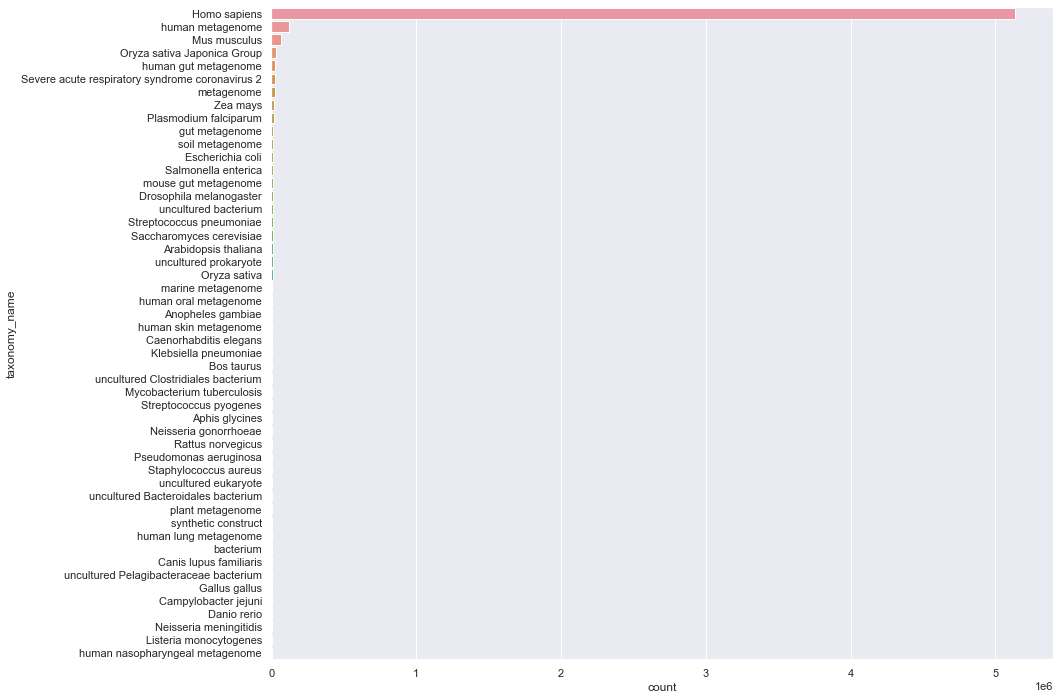

In [95]:
%matplotlib inline
sns.set()

plt.figure(figsize=(14,12))

ax = sns.barplot(y='taxonomy_name', x='count', data=taxonNameDf.head(50)) # note plot is on its side
xticks = [''] * 447
# ax.set_xticklabels(xticks, size=1)
plt.show()

## Since the human samples dominate the plot and counts diminish after Oryza sativa Let's look at taxons excluding Homo sapiens and human metagenome up to Oryza sativa (index 20)

In [104]:
taxonNameDf[2:22]

,taxonomy_id,count,taxonomy_name
2,10090,66941,Mus musculus
3,39947,29163,Oryza sativa Japonica Group
4,408170,27098,human gut metagenome
5,2697049,26641,Severe acute respiratory syndrome coronavirus 2
6,256318,21612,metagenome
7,4577,17827,Zea mays
8,5833,17220,Plasmodium falciparum
9,749906,13517,gut metagenome
10,410658,13247,soil metagenome
11,562,11468,Escherichia coli


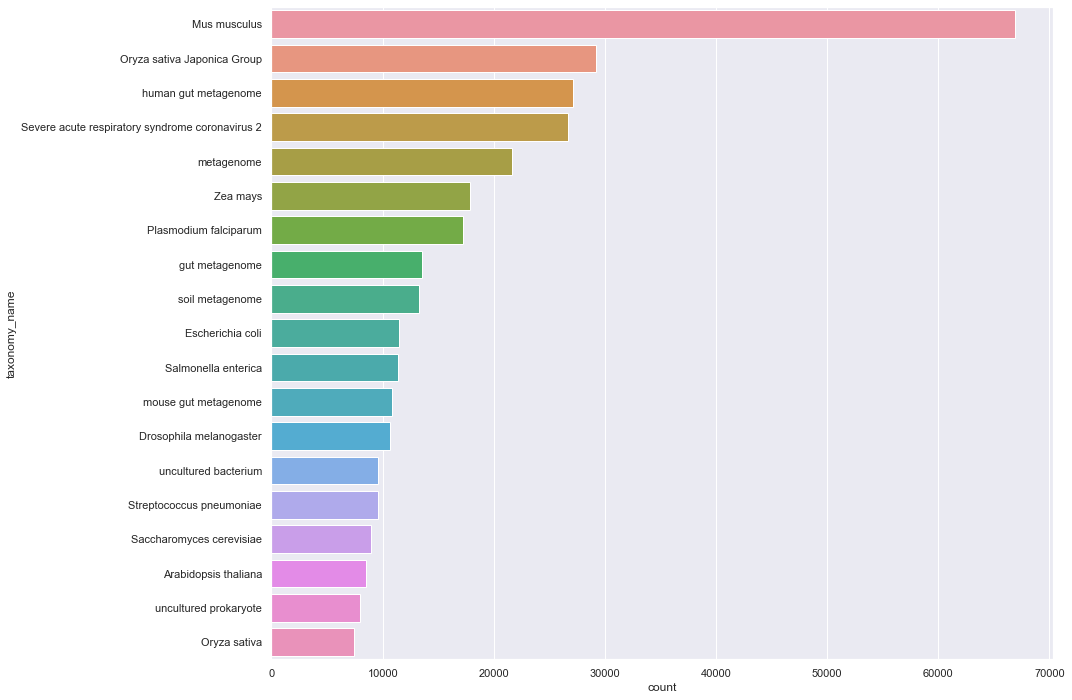

In [103]:
%matplotlib inline
sns.set()

plt.figure(figsize=(14,12))

ax = sns.barplot(y='taxonomy_name', x='count', data=taxonNameDf[2:21]) # note plot is on its side
xticks = [''] * 447
# ax.set_xticklabels(xticks, size=1)
plt.show()